## Importing Libraries

In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
dataset = pd.read_csv('../data/Market_Basket_Optimisation.csv',  header = None)

## Data preprocessing

In [4]:
transactions = []

for i in range(0, 7501):
    transactions.append([str(dataset.values[i, j])for j in range(0, 20)])

## Training Eclat model on dataset

In [5]:
from apyori import apriori

rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualizing results

In [6]:
results = list(rules)

In [7]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [9]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support'])

In [10]:
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Left Hand Side,Right Hand Side,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200


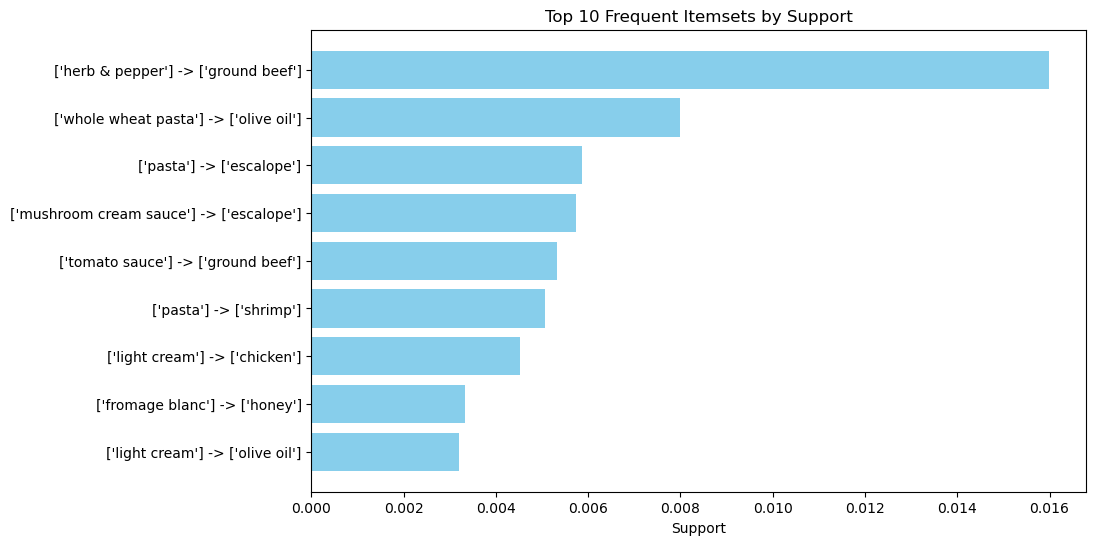

In [16]:
rules_list = list(results)

rules_metrics = []
rules_text = []

for rule in rules_list:
    support = rule.support
    antecedents = list(rule.ordered_statistics[0].items_base)
    consequents = list(rule.ordered_statistics[0].items_add)
    
    rule_text = f"{antecedents} -> {consequents}"
    rules_metrics.append(support)
    rules_text.append(rule_text)

eclat_df = pd.DataFrame(rules_metrics, columns=['Support'])
eclat_df['Itemset'] = rules_text

# Sort by support to get the top itemsets
eclat_df = eclat_df.sort_values(by='Support', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(eclat_df['Itemset'], eclat_df['Support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
